# ALLERGY, FLU AND COVID DETECTION

## IMPORTING LIBRARIES

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

## Data Loading

In [86]:
df = pd.read_csv("data.csv")
df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY


In [87]:
data = df.drop("TYPE",axis=1)
labels = df.loc[:,"TYPE"]

## EDA

In [88]:
data.describe()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
count,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000
mean,0.520662,0.519762,0.519897,0.519358,0.496232,0.495850,0.325400,0.324253,0.324523,0.323465,0.323893,0.324455,0.422986,0.423234,0.184285,0.184285,0.184285,0.184285,0.519313,0.184240
std,0.499579,0.499615,0.499610,0.499631,0.499991,0.499988,0.468529,0.468100,0.468201,0.467804,0.467965,0.468176,0.494039,0.494077,0.387720,0.387720,0.387720,0.387720,0.499633,0.387684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44453 entries, 0 to 44452
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   COUGH                 44453 non-null  int64
 1   MUSCLE_ACHES          44453 non-null  int64
 2   TIREDNESS             44453 non-null  int64
 3   SORE_THROAT           44453 non-null  int64
 4   RUNNY_NOSE            44453 non-null  int64
 5   STUFFY_NOSE           44453 non-null  int64
 6   FEVER                 44453 non-null  int64
 7   NAUSEA                44453 non-null  int64
 8   VOMITING              44453 non-null  int64
 9   DIARRHEA              44453 non-null  int64
 10  SHORTNESS_OF_BREATH   44453 non-null  int64
 11  DIFFICULTY_BREATHING  44453 non-null  int64
 12  LOSS_OF_TASTE         44453 non-null  int64
 13  LOSS_OF_SMELL         44453 non-null  int64
 14  ITCHY_NOSE            44453 non-null  int64
 15  ITCHY_EYES            44453 non-null  int64
 16  ITCH

In [90]:
data.isnull().sum()

COUGH                   0
MUSCLE_ACHES            0
TIREDNESS               0
SORE_THROAT             0
RUNNY_NOSE              0
STUFFY_NOSE             0
FEVER                   0
NAUSEA                  0
VOMITING                0
DIARRHEA                0
SHORTNESS_OF_BREATH     0
DIFFICULTY_BREATHING    0
LOSS_OF_TASTE           0
LOSS_OF_SMELL           0
ITCHY_NOSE              0
ITCHY_EYES              0
ITCHY_MOUTH             0
ITCHY_INNER_EAR         0
SNEEZING                0
PINK_EYE                0
dtype: int64

([<matplotlib.patches.Wedge at 0x121acb83090>,
 [Text(-0.214232471609567, 1.0789367210861145, 'FLU'),
  Text(-0.02320334296306495, -1.0997552477143897, 'ALLERGY'),
  Text(1.0542337963801682, -0.3139922014475176, 'COVID'),
  Text(1.0971208218820456, -0.07953554043863034, 'COLD')],
 [Text(-0.11685407542340016, 0.5885109387742442, '56%'),
  Text(-0.012656368888944516, -0.5998664987533033, '37%'),
  Text(0.5750366162073643, -0.17126847351682775, '5%'),
  Text(0.5984295392083884, -0.043383022057434724, '2%')])

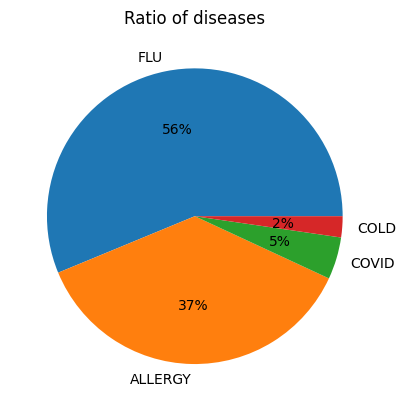

In [91]:
counts = labels.value_counts().to_dict()
plt.title("Ratio of diseases")
plt.pie([i for i in counts.values()],labels=[i for i in counts.keys()],autopct='%.0f%%')

In [92]:
#df[df["TYPE"] in ["COLD","COVID"]]
df = df[(df["TYPE"] != "COLD") & (df["TYPE"] != "COVID")]
data = df.drop("TYPE",axis=1)
labels = df.loc[:,"TYPE"]

<Axes: title={'center': 'Correlation Matrix'}>

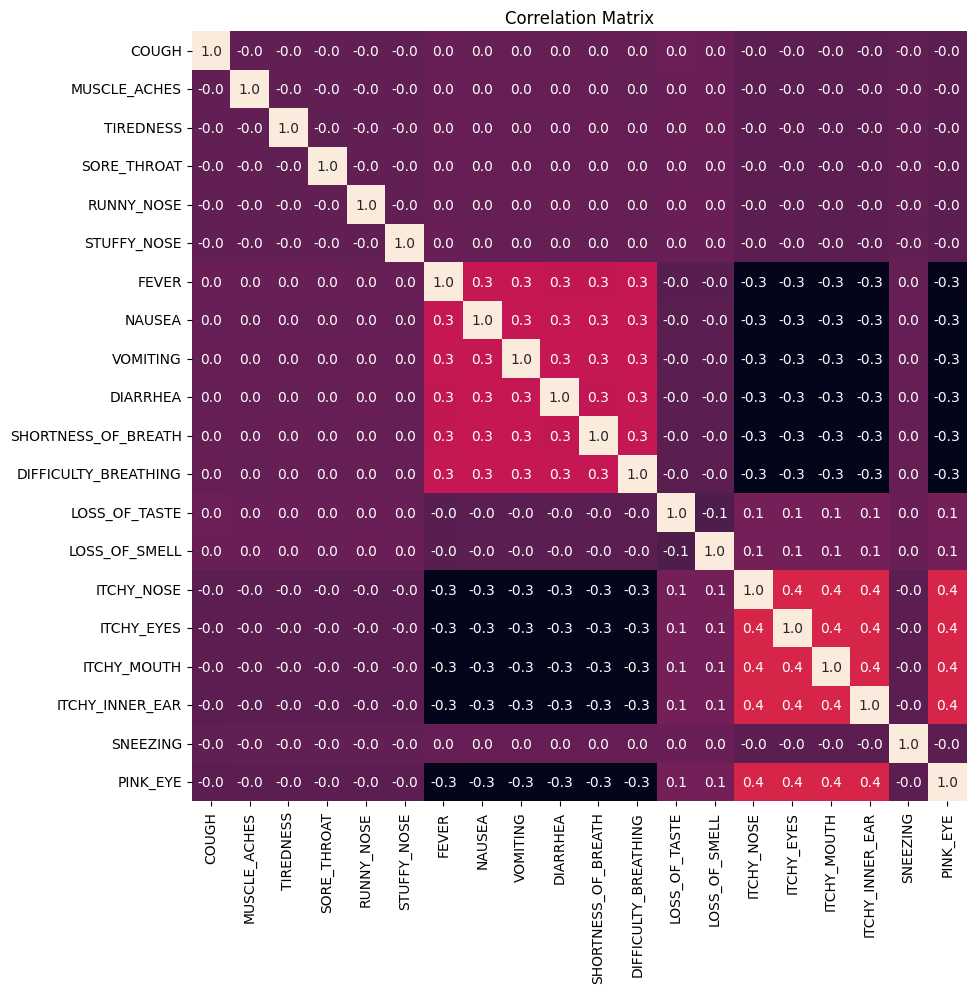

In [93]:
plt.figure(figsize=(10,10))
plt.title("Correlation Matrix")
sns.heatmap(data.corr(),cbar=False,annot=True,fmt=".1f")

In [94]:
enc = LabelEncoder()
labels = enc.fit_transform(labels)
df

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44448,1,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,FLU
44449,1,1,0,1,1,0,1,1,0,1,...,0,1,1,0,0,0,0,1,0,FLU
44450,0,0,1,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,1,0,FLU
44451,0,0,0,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,FLU


## FEATURE ENGINEERING

In [95]:
new_features = pd.DataFrame({})
new_features["LOSS_OF_SENSES"] = (data["LOSS_OF_TASTE"] + data["LOSS_OF_TASTE"])/2
new_features["ITCHINESS"] = (data["ITCHY_NOSE"] + data["ITCHY_EYES"] + data["ITCHY_MOUTH"] + data["ITCHY_INNER_EAR"])/4
new_features["COMMON_SYMPTOMS"] = (data["FEVER"] + data["NAUSEA"] + data["VOMITING"] + data["DIARRHEA"])/4
new_features["BREATHING"] = (data["SHORTNESS_OF_BREATH"] + data["DIFFICULTY_BREATHING"])/2
new_features["TYPE"] = labels
new_features

,LOSS_OF_SENSES,ITCHINESS,COMMON_SYMPTOMS,BREATHING,TYPE
0,1.0,0.50,0.00,0.0,0
1,1.0,0.75,0.00,0.0,0
2,1.0,0.25,0.00,0.0,0
3,1.0,0.25,0.00,0.0,0
4,1.0,0.50,0.00,0.0,0
...,...,...,...,...,...
44448,0.0,0.00,0.75,0.0,1
44449,1.0,0.00,0.75,0.0,1
44450,1.0,0.00,0.50,0.5,1
44451,0.0,0.00,0.25,0.5,1


<Axes: title={'center': 'Correlation Matrix(NEW FEATURES)'}>

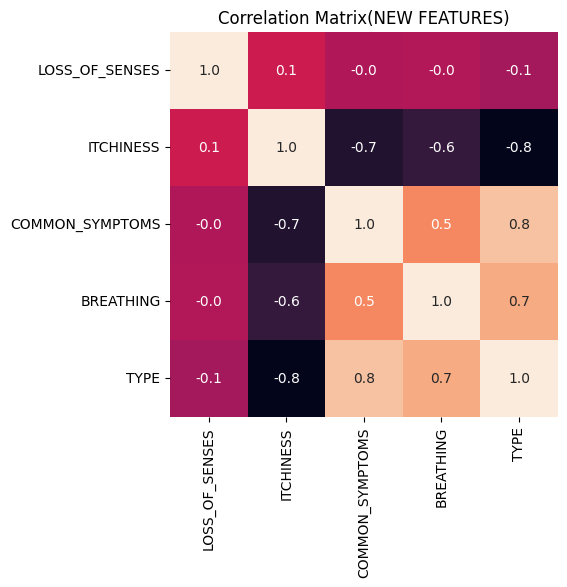

In [96]:
plt.figure(figsize=(5,5))
plt.title("Correlation Matrix(NEW FEATURES)")
sns.heatmap(new_features.corr(),cbar=False,annot=True,fmt=".1f")

In [97]:
new_features = new_features.drop("TYPE",axis=1)
data1 = pd.concat((data,new_features),axis=1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41381 entries, 0 to 44452
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   COUGH                 41381 non-null  int64  
 1   MUSCLE_ACHES          41381 non-null  int64  
 2   TIREDNESS             41381 non-null  int64  
 3   SORE_THROAT           41381 non-null  int64  
 4   RUNNY_NOSE            41381 non-null  int64  
 5   STUFFY_NOSE           41381 non-null  int64  
 6   FEVER                 41381 non-null  int64  
 7   NAUSEA                41381 non-null  int64  
 8   VOMITING              41381 non-null  int64  
 9   DIARRHEA              41381 non-null  int64  
 10  SHORTNESS_OF_BREATH   41381 non-null  int64  
 11  DIFFICULTY_BREATHING  41381 non-null  int64  
 12  LOSS_OF_TASTE         41381 non-null  int64  
 13  LOSS_OF_SMELL         41381 non-null  int64  
 14  ITCHY_NOSE            41381 non-null  int64  
 15  ITCHY_EYES            41

In [98]:
X_train,X_test,y_train,y_test = train_test_split(np.array(data1),labels,test_size=0.2,random_state=123)

## TRAINING 

In [99]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [100]:
print("Train Score",lr.score(X_train,y_train))
print("Test Score",lr.score(X_test,y_test))

Train Score 0.9946230062832286
Test Score 0.9952881478796666


		Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3254
           1       0.99      1.00      1.00      5023

    accuracy                           1.00      8277
   macro avg       1.00      0.99      1.00      8277
weighted avg       1.00      1.00      1.00      8277



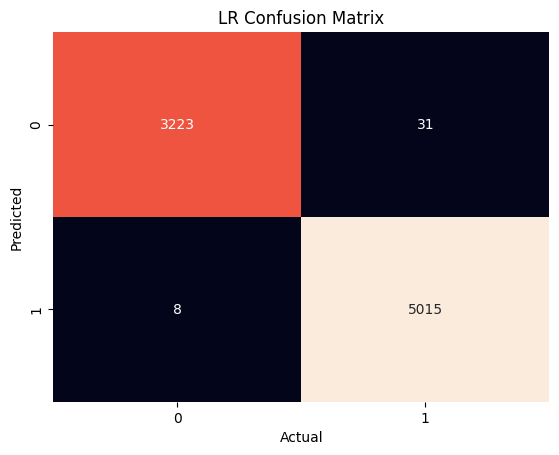

In [101]:
preds = lr.predict(X_test)
print("\t\tClassification Report\n",classification_report(preds,y_test))
plt.figure()
plt.title("LR Confusion Matrix")
sns.heatmap(confusion_matrix(preds,y_test),annot=True,cbar=False,fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [102]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [103]:
print("Train Score",knn.score(X_train,y_train))
print("Test Score",knn.score(X_test,y_test))

Train Score 0.9948344610923151
Test Score 0.9935967137851879


		Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3248
           1       0.99      1.00      0.99      5029

    accuracy                           0.99      8277
   macro avg       0.99      0.99      0.99      8277
weighted avg       0.99      0.99      0.99      8277



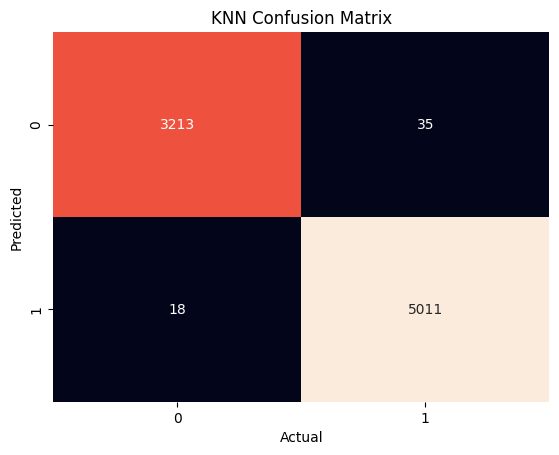

In [104]:
preds = knn.predict(X_test)
print("\t\tClassification Report\n",classification_report(preds,y_test))
plt.figure()
plt.title("KNN Confusion Matrix")
sns.heatmap(confusion_matrix(preds,y_test),annot=True,cbar=False,fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [105]:
dtree = DecisionTreeClassifier(random_state=123)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

		Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3234
           1       0.99      0.99      0.99      5043

    accuracy                           0.99      8277
   macro avg       0.99      0.99      0.99      8277
weighted avg       0.99      0.99      0.99      8277



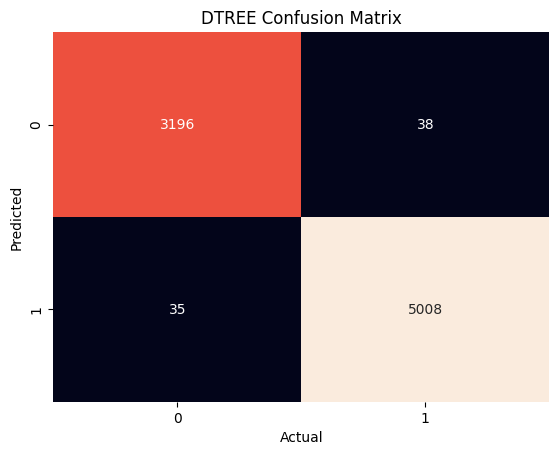

In [106]:
preds = dtree.predict(X_test)
print("\t\tClassification Report\n",classification_report(preds,y_test))
plt.figure()
plt.title("DTREE Confusion Matrix")
sns.heatmap(confusion_matrix(preds,y_test),annot=True,cbar=False,fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [107]:
print("Train Score",dtree.score(X_train,y_train))
print("Test Score",dtree.score(X_test,y_test))

Train Score 0.9955594490091831
Test Score 0.9911803793645041


		Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3234
           1       0.99      0.99      0.99      5043

    accuracy                           0.99      8277
   macro avg       0.99      0.99      0.99      8277
weighted avg       0.99      0.99      0.99      8277



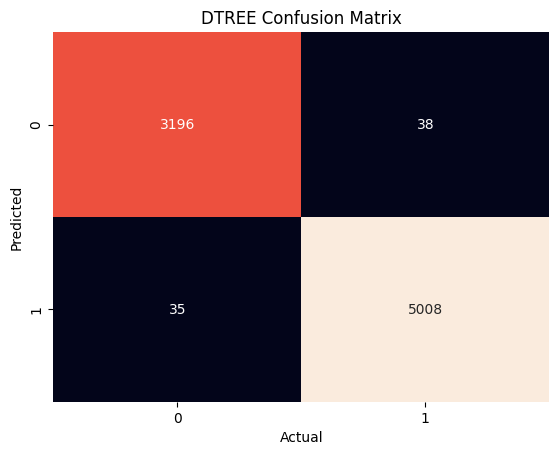

In [113]:
preds = dtree.predict(X_test)
print("\t\tClassification Report\n",classification_report(preds,y_test))
plt.figure()
plt.title("DTREE Confusion Matrix")
sns.heatmap(confusion_matrix(preds,y_test),annot=True,cbar=False,fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [108]:
rf = RandomForestClassifier(random_state=23)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=23)

In [109]:
print("Train Score",rf.score(X_train,y_train))
print("Test Score",rf.score(X_test,y_test))

Train Score 0.9955594490091831
Test Score 0.9915428295276066


		Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3239
           1       0.99      0.99      0.99      5038

    accuracy                           0.99      8277
   macro avg       0.99      0.99      0.99      8277
weighted avg       0.99      0.99      0.99      8277



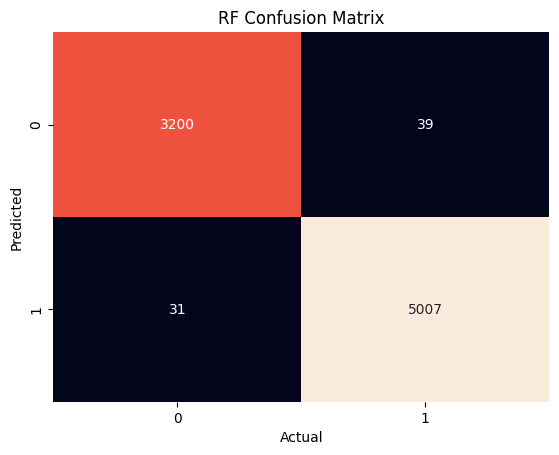

In [114]:
preds = rf.predict(X_test)
print("\t\tClassification Report\n",classification_report(preds,y_test))
plt.figure()
plt.title("RF Confusion Matrix")
sns.heatmap(confusion_matrix(preds,y_test),annot=True,cbar=False,fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## SAVING THE MODEL

In [110]:
#with open("LR_FLU_ALLERGY.pkl",'wb') as file:
#    pickle.dump(lr,file)

## TESTING

In [116]:
import pickle
with open("LR_FLU_ALLERGY.pkl",'rb') as file:
    model = pickle.load(file)
def predictions(cough,muscle_aches,tiredness,sore_throat,runny_nose,stuffy_nose,fever,nausea,vomiting,diarrhea,shortness_of_breath,difficulty_breathing,loss_of_taste,loss_of_smell,itchy_nose,itchy_eyes,itchy_mouth,itchy_inner_ear,sneezing,pink_eye):
    loss_of_senses = (loss_of_taste + loss_of_smell)/2
    itchiness = (itchy_nose + itchy_eyes + itchy_mouth + itchy_inner_ear)/4
    common_symptoms = (fever + nausea + vomiting + diarrhea)/4
    breathing = (shortness_of_breath + difficulty_breathing)/2
    x = np.array([[cough,muscle_aches,tiredness,sore_throat,runny_nose,stuffy_nose,fever,nausea,vomiting,diarrhea,shortness_of_breath,difficulty_breathing,loss_of_taste,loss_of_smell,itchy_nose,itchy_eyes,itchy_mouth,itchy_inner_ear,sneezing,pink_eye,loss_of_senses,itchiness,common_symptoms,breathing]])
    prediction = model.predict(x)
    if prediction[0] == 0:
        prediction = "Allergy"
    else:
        prediction = "Flu"
    return prediction
x1 = predictions(1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0)
x2 = predictions(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1)

LogisticRegression()